In [1]:

from ngsolve import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo
import sys
sys.path.append(r'..\..\bin\Release') 
from EMPY_Field import *
sys.path.append('..\model')
from Cylinder_Yaxis_1Layer import Cylinder_Yaxis_1Layer

model=Cylinder_Yaxis_1Layer()
mesh=model.mesh
Draw(mesh)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

enter iccg_solve
Dof= 13024    matrix size= 418893.0
shift parameter= 1.0
minimum residual= 2.943403191034234e-16  at iteraions:  79


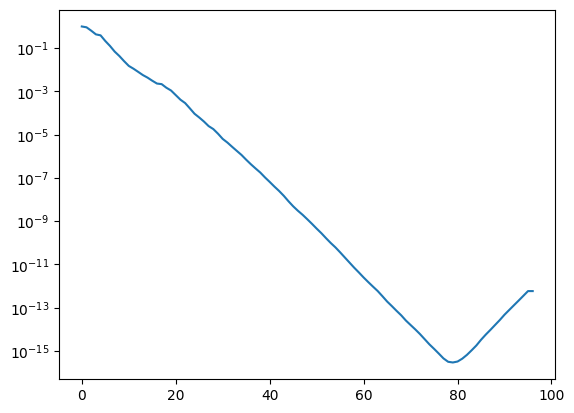

結果のノルム: 2.3830482215255884e-13
power=  245943.40099507855


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

(5.648912794749248e-08, 1.8034297052390336, -1.9039769542225084e-14)


In [2]:
import math
import sys
sys.path.append('..\include')
from MatrixSolver import MatrixSolver as solver 

Dirichlet=False
feorder=3
Mu=model.Mu
field=UNIF(0,1,0,0)

mu=4.e-7*math.pi
normal = specialcf.normal(mesh.dim)

if Dirichlet==False:
    fesOmega=H1(mesh, order=feorder)
else:
    fesOmega=H1(mesh, order=feorder, dirichlet="reduced_boundary")
    
omega,psi = fesOmega.TnT()
a= BilinearForm(fesOmega)
a +=Mu*(grad(omega)*grad(psi))*dx
with TaskManager():
    a.Assemble()

gfOmega = GridFunction(fesOmega)

if Dirichlet==False:
    b=Bfield(field)
    f = LinearForm(fesOmega)
    f += (normal*b)*psi*ds("reduced_boundary")
    with TaskManager():
        f.Assemble()
    gfOmega=solver.iccg_solve(fesOmega, gfOmega, a, f.vec.FV(), tol=1.e-16, max_iter=200, accel_factor=0.0, complex=False,
                             logplot=True)

else:  
    O=Ofield(field)
    gfOmega.Set(O, BND, mesh.Boundaries("reduced_boundary"))
    """
    r=-a.mat*gfOmega.vec
    gfOmega=solver.iccg_solve(fesOmega, gfOmega, a, r.Evaluate(), tol=1.e-16, max_iter=200, accel_factor=0, complex=False)

    """
    f = LinearForm(fesOmega)
    f +=-Mu*grad(gfOmega)*grad(psi)*dx
    with TaskManager():
        f.Assemble()  
    gfOmega=solver.iccg_solve(fesOmega, gfOmega, a, f.vec.FV(), tol=1.e-16, max_iter=200, accel_factor=0, complex=False,
                             logplot=True)
    
 
Draw (gfOmega*mu, mesh, order=3, min=-1.0, max=1.0, deformation=False)       
Bfield=Mu*grad(gfOmega)
Draw (Bfield, mesh, order=3, min=0.5, max=1.5, deformation=False)

mip = mesh(0,0,0)
print(Bfield(mip))


Dirichlet=True

Omega field
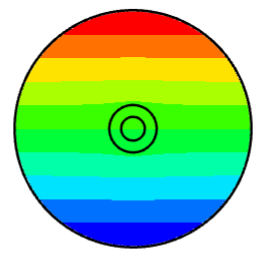

(5.836158555429624e-08, 1.8331838248778092, -2.1157568194808561e-16) at (0,0,0)

B field
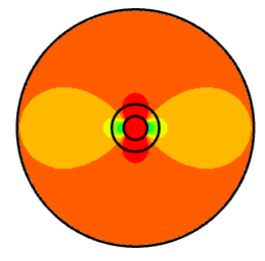

Dirichlet=False

Omega field
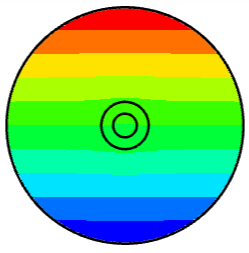

(5.648912794749248e-08, 1.8034297052390336, -1.9039769542225084e-14) at (0,0,0)

B field 
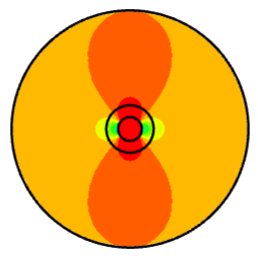

In [3]:
help(Draw)

Help on function Draw in module netgen.webgui:

Draw(obj, *args, show=True, **kwargs)



In [14]:
Draw(Bfield, mesh, "color", "red", x=True)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [8]:
Draw (gfOmega*mu, mesh, order=3, min=-1.0, max=1.0, deformation=False)  

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene